# Alireza Razzaghi
# MA Computational Linguistics

https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

To help you compare vehicles from different model years, the fuel consumption ratings for 2000 to 2022 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving. Note that these are approximate values that were generated from the original ratings, not from vehicle testing.

Original data to [Open Canada Data](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

About this file

Add Suggestion
### Model

- 4WD/4X4: Four-wheel drive
- AWD: All-wheel drive
- CNG: Compressed natural gas
- FFV: Flexible-fuel vehicle
- NGV: Natural gas vehicle
- #: High output engine that provides more power than the standard engine of the same size

### Transmission

- A: Automatic
- AM: Automated manual
- AS: Automatic with select shift
- AV: Continuously variable
- M: Manual
- 3 - 10: Number of gears

### Fuel Type

- X: Regular gasoline
- Z: Premium gasoline
- D: Diesel
- E: Ethanol (E85)
- N: Natural Gas

### Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

Based on this [link](https://www.ageco.co.uk/useful-articles/car/what-are-the-co2-emissions-of-my-car/)

- 150g/km emission is considered low
- 160 to 255g/km emission is considered medium
- Above 255g/km emission is considered high

Finding emmision based on other features

In [1]:
import pandas as pd
import numpy as np

In [2]:
# open the dataset
Dataset_initial = pd.read_csv("Fuel_Consumption_2000-2022.csv")

In [3]:
Dataset_initial.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
# check the columns for null or missing values
Dataset_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
Dataset_initial.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [6]:
def get_null_features(df, df_name):
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if null_columns.empty:
        print(f"No null values found in {df_name}")
    else:
        print(f"Features with null values in {df_name}:")
        print(null_columns)

get_null_features(Dataset_initial, "Dataset_initial")

No null values found in Dataset_initial


In [7]:
import numpy as np

# Calculate the number of data points in the dataset
num_data_points = len(Dataset_initial)

# Calculate the number of bins using the Square Root Rule
num_bins = int(np.sqrt(num_data_points))

print("Number of Data Points:", num_data_points)
print("Number of Bins (Square Root Rule):", num_bins)


Number of Data Points: 22556
Number of Bins (Square Root Rule): 150


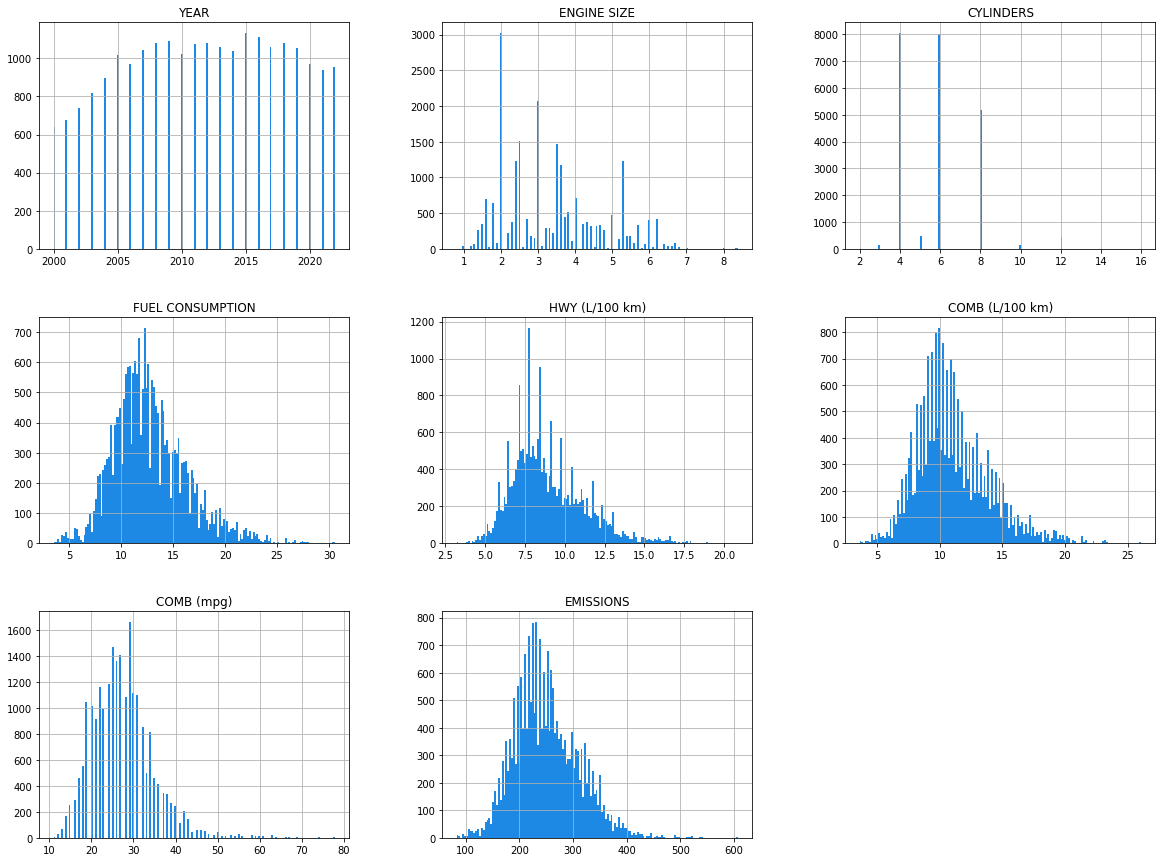

In [8]:
# Visualizing histograms
%matplotlib inline
import matplotlib.pyplot as plt

Dataset_initial.hist(bins=150, figsize=(20,15), color='#1E88E5')
plt.show()

In [9]:
Dataset_initial.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [10]:
target_cols = ['EMISSIONS']  # Since 'EMISSIONS' is the only target column in this case
features_cols = ['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
                'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']

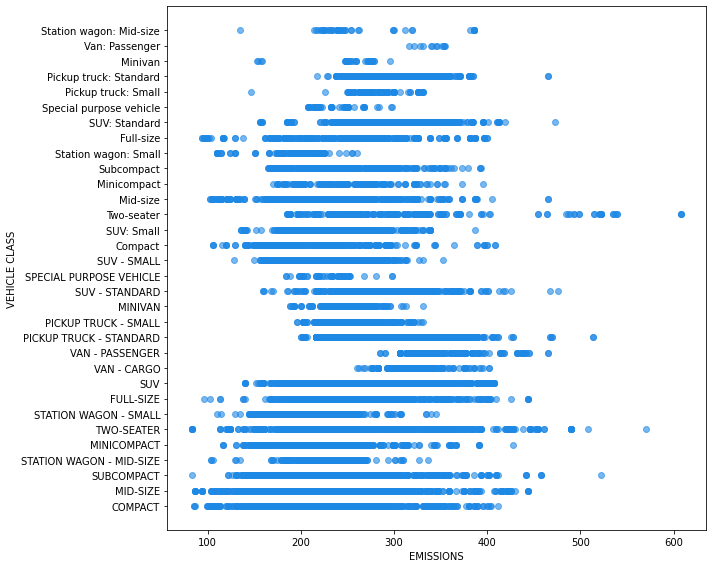

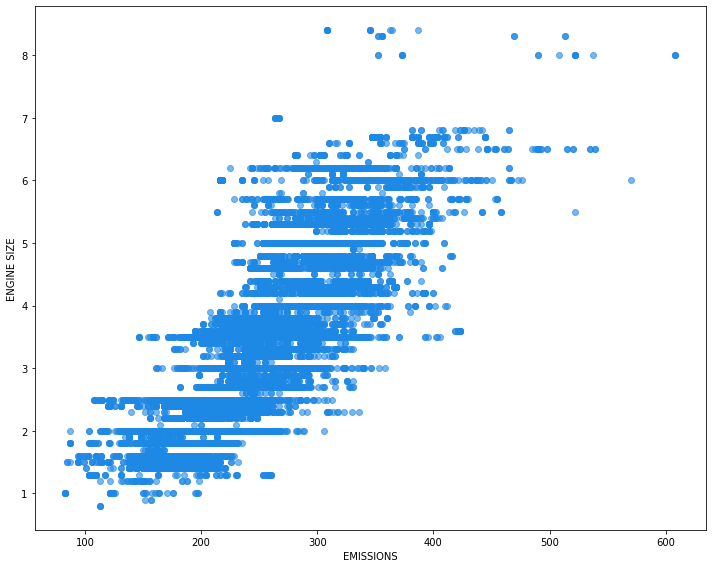

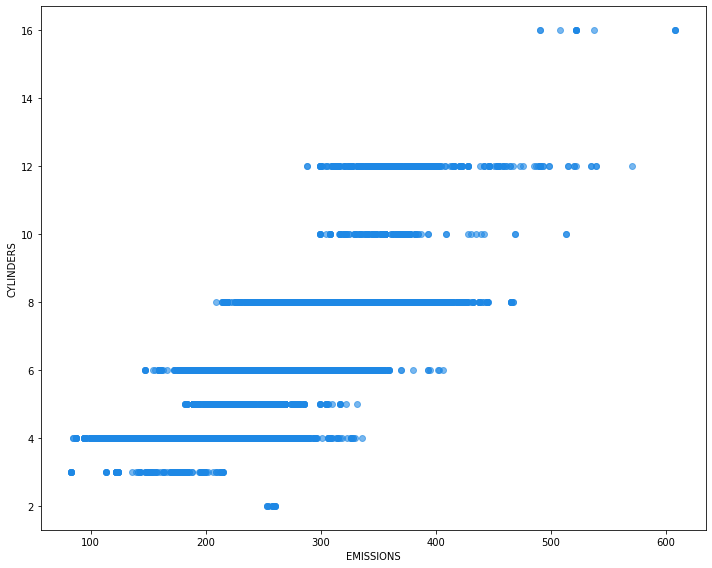

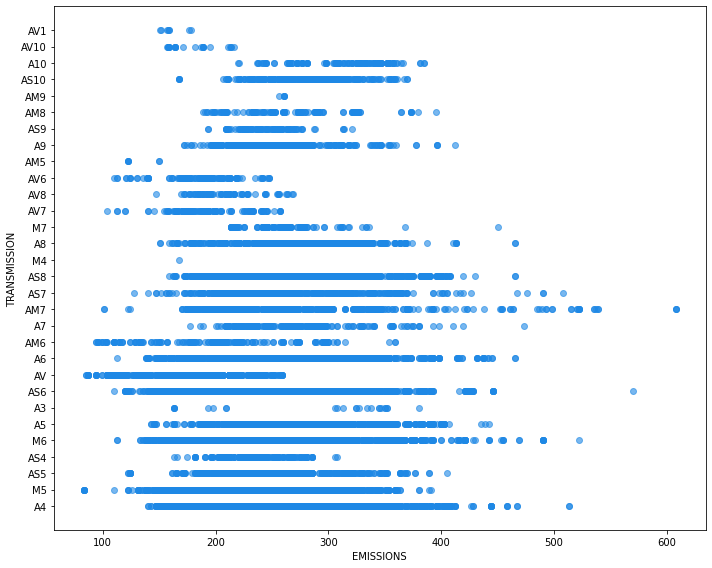

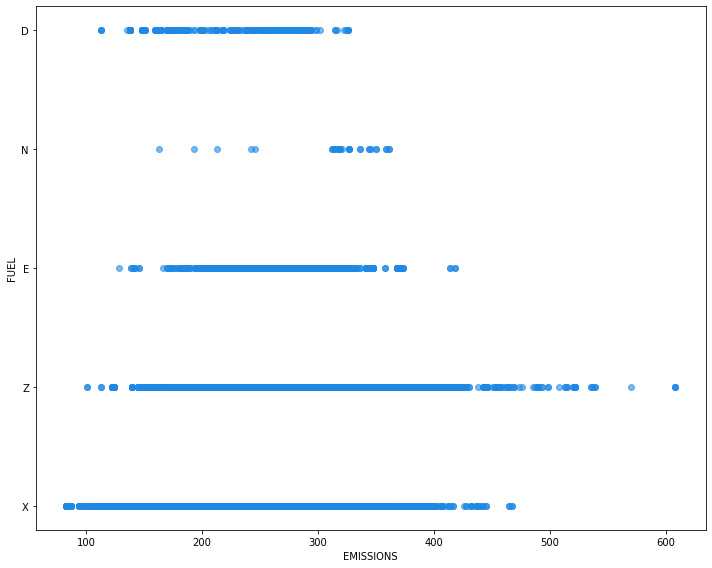

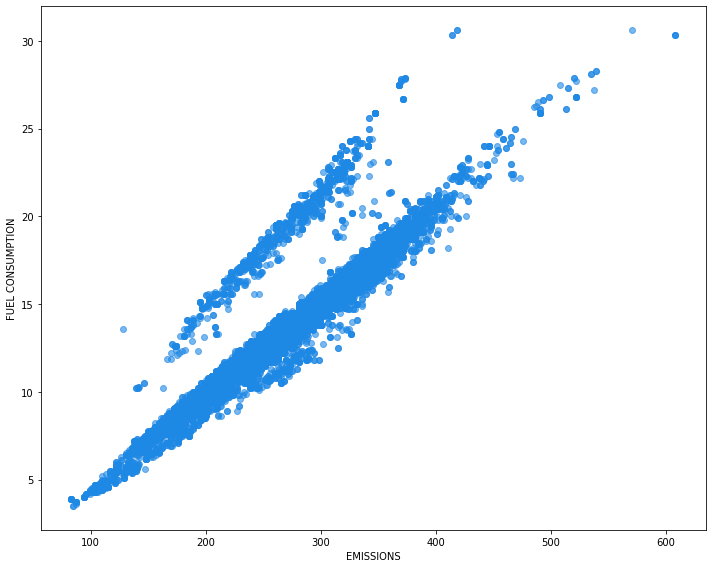

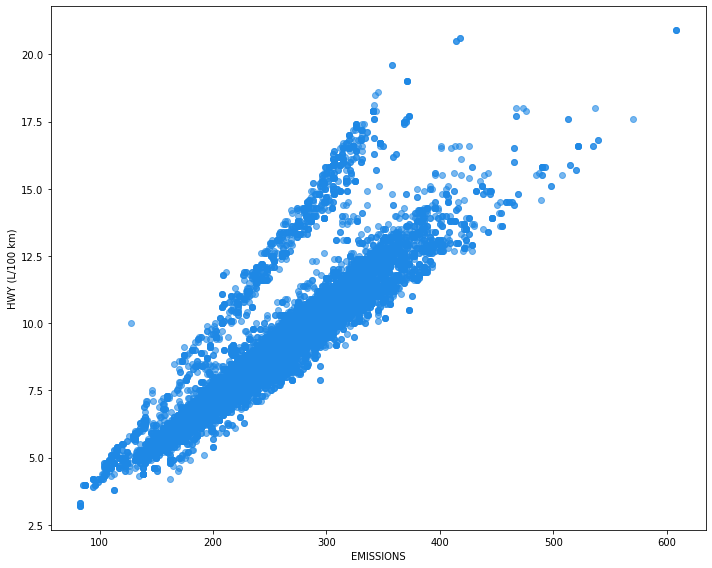

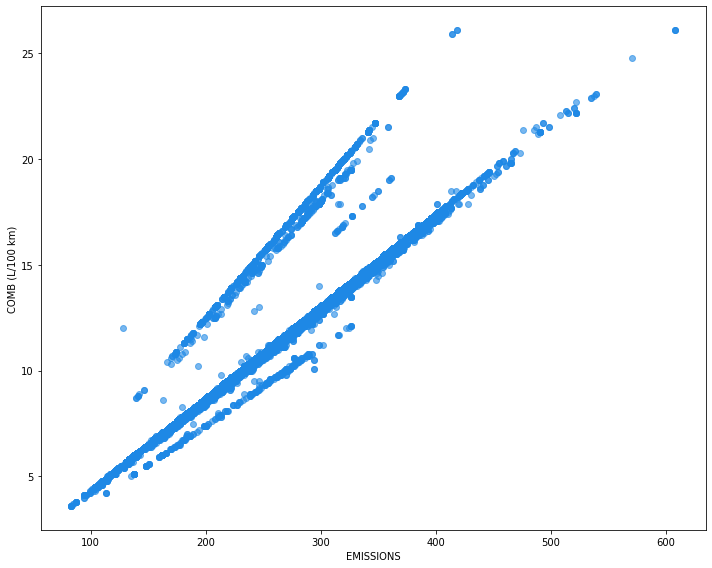

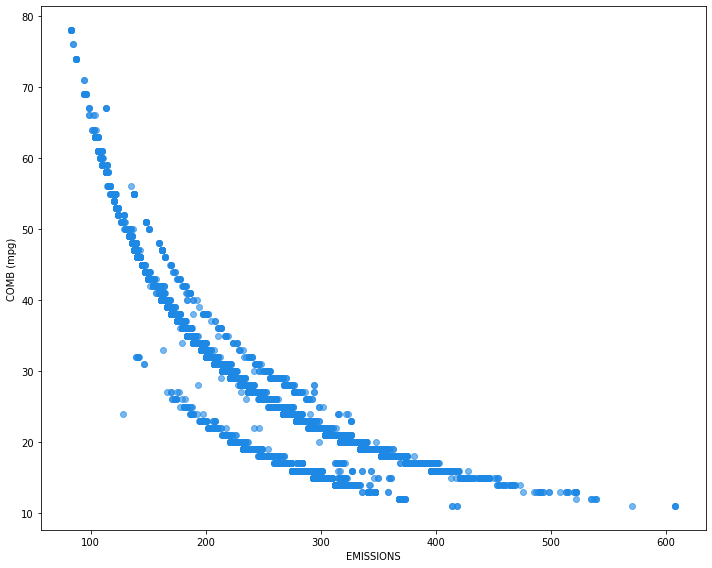

In [11]:
import matplotlib.pyplot as plt

targets_cols = ['EMISSIONS']  
features_cols = ['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
                'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']
num_features = len(features_cols)

# scatter plots
for feature_col in features_cols:
    fig, axs = plt.subplots(1, len(targets_cols), figsize=(10, 8))
    for target_col in targets_cols:
        axs.scatter(Dataset_initial[target_col], Dataset_initial[feature_col], color='#1E88E5', alpha=0.6)
        axs.set_xlabel(target_col)
        axs.set_ylabel(feature_col)
    plt.tight_layout()
    plt.show()


no relation between emssion and vehicle class, engine size, cylinders, trasmission, fuel.

In [12]:
Dataset_initial

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [13]:
#segment emission to low, medium and high
Dataset_initial["CO2 Emission Class"] = pd.cut(Dataset_initial["EMISSIONS"],
                               bins=[0.,160, 255,np.inf],
                               labels=["low", "medium", "high"])

In [14]:
print(Dataset_initial["CO2 Emission Class"].value_counts())

CO2 Emission Class
medium    12338
high       9287
low         931
Name: count, dtype: int64


In [15]:
print(Dataset_initial["CYLINDERS"].value_counts())

CYLINDERS
4     8049
6     8021
8     5187
5      499
12     451
10     162
3      159
2       16
16      12
Name: count, dtype: int64


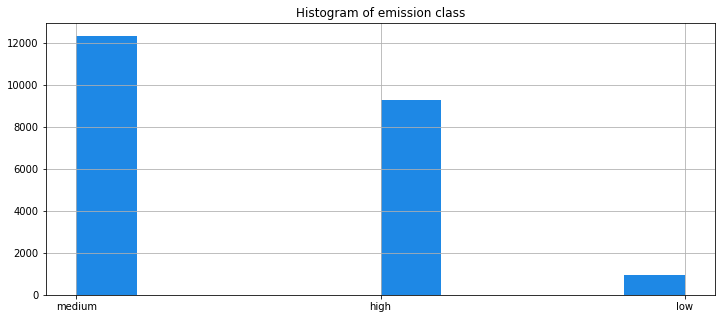

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# histogram for 'Emission'
plt.plot(1, 2, 1)
Dataset_initial["CO2 Emission Class"].hist(color='#1E88E5')
plt.title('Histogram of emission class')


plt.show()


In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
emission_cat = Dataset_initial[["CO2 Emission Class"]]
emission_cat_1hot = cat_encoder.fit_transform(emission_cat)

In [18]:
import pandas as pd

# Create a DataFrame from the one-hot encoded representation
emission_cat_1hot_df = pd.DataFrame(emission_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Concatenate the one-hot encoded DataFrame with the original DataFrame
Full_dataset = pd.concat([Dataset_initial, emission_cat_1hot_df], axis=1)



In [19]:
Full_dataset.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0


In [20]:
fuel_cat =  Dataset_initial[['FUEL']]
fuel_cat_1hot = cat_encoder.fit_transform(fuel_cat)

fuel_cat_1hot_df = pd.DataFrame(fuel_cat_1hot, columns=cat_encoder.get_feature_names_out())

Full_dataset2 = pd.concat([Full_dataset, fuel_cat_1hot_df], axis=1)

In [6]:
pd.set_option('display.max_columns', None) #see all columns

In [22]:
Full_dataset2.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
TRANSMISSION_cat =  Dataset_initial[['TRANSMISSION']]
TRANSMISSION_cat_1hot = cat_encoder.fit_transform(TRANSMISSION_cat)

TRANSMISSION_cat_1hot_df = pd.DataFrame(TRANSMISSION_cat_1hot, columns=cat_encoder.get_feature_names_out())

Full_dataset3 = pd.concat([Full_dataset2, TRANSMISSION_cat_1hot_df], axis=1)

In [24]:
Full_dataset3.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
Full_dataset3.to_csv('Full_dataset3.csv')

In [3]:
import pandas as pd
Full_dataset3 = pd.read_csv('Full_dataset3.csv')

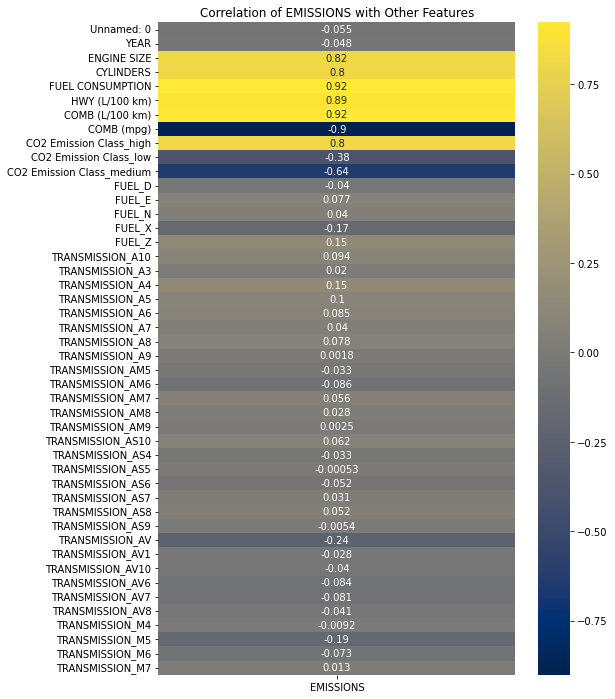

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_data = Full_dataset3.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

emission_corr = correlation_matrix['EMISSIONS']
emission_corr_df = emission_corr.drop(['EMISSIONS']).to_frame()

# Plotting the correlation of 'EMISSIONS' with other features
plt.figure(figsize=(8, 12))
sns.heatmap(emission_corr_df, annot=True, cmap='cividis')
plt.title('Correlation of EMISSIONS with Other Features')
plt.show()


Linearity with engine size, cylinders, fuel consumptuin, HWY, COMB, COMB (mpg)

In [52]:
Full_dataset3.head(3)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
linear_df_regression = Full_dataset3['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']

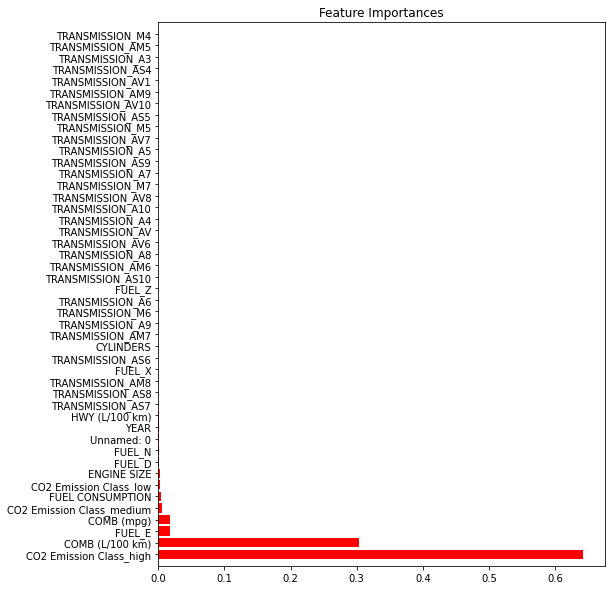

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Selecting only numeric columns from the dataset
numeric_data = Full_dataset3.select_dtypes(include=['number'])

# Assuming 'EMISSIONS' is already separated as the target column
X = numeric_data.drop('EMISSIONS', axis=1)
y = numeric_data['EMISSIONS']

# Train a RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")  # Swap x and y axis
plt.yticks(range(X.shape[1]), X.columns[indices])  # Set y-axis ticks as feature names
plt.ylim([-1, X.shape[1]])  # Set y-axis limit
plt.show()


COMB (L/100 km), COMB (mpg), FUEL E

# The notebook in kaggle 
achieved lower scores [link](https://www.kaggle.com/code/solarielee/fuel-consumption) for linear regression and random forest and decision tree by using 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)','EMISSIONS'.

Maybe it would be better for me to only use COMB (L/100 km)

In [53]:
Full_dataset3.head(3)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
linear_df_features = Full_dataset3[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)", "EMISSIONS"]]
RadnomFregressorf_df = Full_dataset3[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E", "EMISSIONS"]]
#df_labels_regression = Full_dataset3["EMISSIONS"]

In [61]:
linear_df_features

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,9.2,6.7,8.1,35,186
1,1.6,4,8.5,6.5,7.6,37,175
2,3.2,6,12.2,7.4,10.0,28,230
3,3.5,6,13.4,9.2,11.5,25,264
4,1.8,4,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...
22551,2.0,4,10.7,7.7,9.4,30,219
22552,2.0,4,10.5,8.1,9.4,30,219
22553,2.0,4,11.0,8.7,9.9,29,232
22554,2.0,4,11.5,8.4,10.1,28,236


In [6]:
np.random.seed(42)

from sklearn.model_selection import StratifiedShuffleSplit

# Assuming your data is in a DataFrame called Full_dataset3
features = Full_dataset3.drop(["CO2 Emission Class_high", "CO2 Emission Class_low", "CO2 Emission Class_medium"], axis=1)
target = Full_dataset3["CO2 Emission Class"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(features, target):
    stratified_train = features.loc[train_index]
    stratified_test = features.loc[test_index]

stratified_test["CO2 Emission Class"].value_counts() / len(stratified_test)


CO2 Emission Class
medium    0.546986
high      0.411791
low       0.041223
Name: count, dtype: float64

In [7]:
Full_dataset3["CO2 Emission Class"].value_counts() / len(Full_dataset3)

CO2 Emission Class
medium    0.546994
high      0.411731
low       0.041275
Name: count, dtype: float64

In [8]:
Linear_data_train = stratified_train[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)"]]
Linear_data_test = stratified_test[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)"]]

label_train = stratified_train["EMISSIONS"]
label_test = stratified_test["EMISSIONS"]

RandomFregressot_data_train = stratified_train[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E"]]
RandomFregressot_data_test = stratified_test[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E"]]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_linear_data_train = scaler.fit_transform(Linear_data_train)
scaled_linear_data_test = scaler.fit_transform(Linear_data_test)

scaled_RandomFRegg_train = scaler.fit_transform(RandomFregressot_data_train)
scaled_RandomFRegg_test = scaler.fit_transform(RandomFregressot_data_test)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    
    # RMSE
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    print(f'{type(model).__name__} Root Mean Square Error (RMSE): {rmse:.2f}')
    
    #MAE
    mae = mean_absolute_error(y, predictions)
    print(f'{type(model).__name__} Mean Absolute Error (MAE): {mae:.2f}')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model_with_validation(model, X, y):
    # Train and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Train set
    y_train_predict = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    train_mae = mean_absolute_error(y_train, y_train_predict)
    print(f'{model_name} Training Set RMSE: {train_rmse:.2f}')
    print(f'{model_name} Training Set MAE: {train_mae:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_predict))
    val_mae = mean_absolute_error(y_val, y_val_predict)
    print(f'{model_name} Validation Set RMSE: {val_rmse:.2f}')
    print(f'{model_name} Validation Set MAE: {val_mae:.2f}')


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

def plot_learning_curves_and_evaluate(model, X, y, xlim=None, ylim=None, figsize=(7, 4)):
    plt.figure(figsize=figsize)  
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Adjust title based on whether axis limits are defined or not
    if xlim is not None and ylim is not None:
        title = f'Validation vs Training in a Specific Range - {model_name}'
    else:
        title = f'Validation vs Training in the whole dataset - {model_name}'
    
    plt.title(title, fontsize=14)
    
    # Apply axis limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    # Evaluate model
    # Train set
    y_train_predict = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    train_mae = mean_absolute_error(y_train, y_train_predict)
    print(f'{model_name} Training Set RMSE: {train_rmse:.2f}')
    print(f'{model_name} Training Set MAE: {train_mae:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_predict))
    val_mae = mean_absolute_error(y_val, y_val_predict)
    print(f'{model_name} Validation Set RMSE: {val_rmse:.2f}')
    print(f'{model_name} Validation Set MAE: {val_mae:.2f}')
    
    plt.show()


In [26]:
#empty dataframes to store best score of each model
regression_performance = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

In [27]:
def add_model_performance(df, model_name, rmse, mae):
    df_length = len(df)
    df.loc[df_length] = [model_name, rmse, mae]

In [14]:
x_train, x_val, y_train, y_val = train_test_split(scaled_linear_data_train, label_train, test_size=0.2, random_state=10)

LinearRegression Training Set RMSE: 19.40
LinearRegression Training Set MAE: 11.68
LinearRegression Validation Set RMSE: 19.41
LinearRegression Validation Set MAE: 11.85


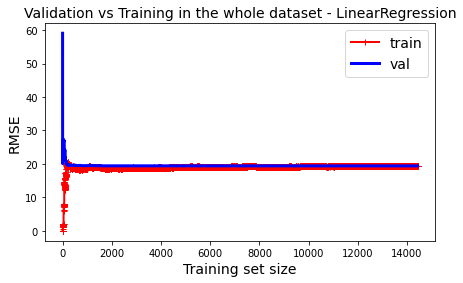

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(scaled_linear_data_train, label_train)

plot_learning_curves_and_evaluate(lin_reg, scaled_linear_data_train, label_train)

In [28]:
#valdiation score as score
add_model_performance(regression_performance, 'LinearRegression + linear features', 19.41, 11.85)

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

evaluate_model_with_validation(lin_reg, scaled_linear_data_train, label_train)

LinearRegression Training Set RMSE: 19.40
LinearRegression Training Set MAE: 11.68
LinearRegression Validation Set RMSE: 19.41
LinearRegression Validation Set MAE: 11.85


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2, 3]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(scaled_linear_data_train, label_train)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 3


Pipeline Training Set RMSE: 13.79
Pipeline Training Set MAE: 6.88
Pipeline Validation Set RMSE: 14.89
Pipeline Validation Set MAE: 7.23


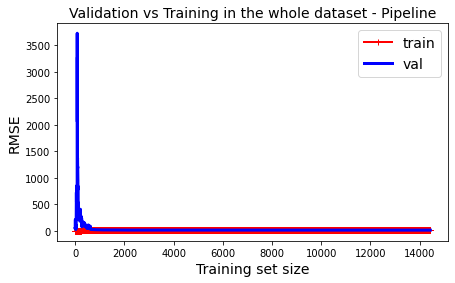

In [86]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves_and_evaluate(polynomial_regression, scaled_linear_data_train, label_train)

In [29]:
add_model_performance(regression_performance, 'polynomial regression + linear features', 14.89, 7.23)

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest.fit(RandomFregressot_data_train, label_train.values.ravel())

RandomForestRegg_best_estimator = grid_search_forest.best_estimator_

RandomForestRegressor Training Set RMSE: 5.02
RandomForestRegressor Training Set MAE: 2.69
RandomForestRegressor Validation Set RMSE: 5.46
RandomForestRegressor Validation Set MAE: 2.81


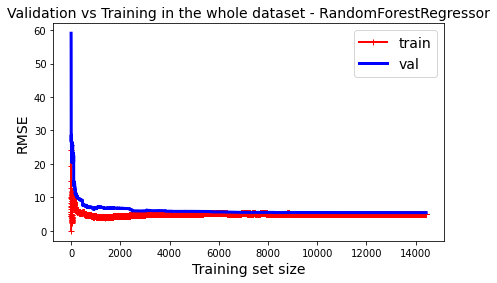

In [89]:
plot_learning_curves_and_evaluate(RandomForestRegg_best_estimator, RandomFregressot_data_train, label_train)

In [30]:
add_model_performance(regression_performance, 'Random Forest', 5.46, 2.81)

DecisionTreeRegressor Training Set RMSE: 5.26
DecisionTreeRegressor Training Set MAE: 2.83
DecisionTreeRegressor Validation Set RMSE: 5.61
DecisionTreeRegressor Validation Set MAE: 2.91


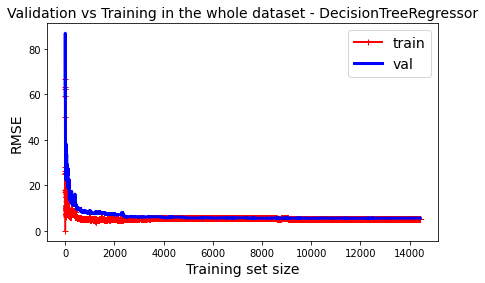

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(RandomFregressot_data_train, label_train)

DescionTRegg_best_estimator = grid_search_tree.best_estimator_

plot_learning_curves_and_evaluate(DescionTRegg_best_estimator, RandomFregressot_data_train, label_train)

In [31]:
add_model_performance(regression_performance, 'Decision Tree + RandomForest features', 5.61, 2.91)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(RandomFregressot_data_train, label_train)

knn_best_estimator = grid_search_knn.best_estimator_


In [20]:
# Model evaluation
evaluate_model(knn_best_estimator, RandomFregressot_data_train, label_train)

KNeighborsRegressor Root Mean Square Error (RMSE): 5.57
KNeighborsRegressor Mean Absolute Error (MAE): 2.80


In [21]:
evaluate_model_with_validation(knn_best_estimator, RandomFregressot_data_train, label_train)

KNeighborsRegressor Training Set RMSE: 5.52
KNeighborsRegressor Training Set MAE: 2.79
KNeighborsRegressor Validation Set RMSE: 5.76
KNeighborsRegressor Validation Set MAE: 2.86


In [32]:
add_model_performance(regression_performance, 'KNN + RandomForest features', 5.76, 2.86)

XGBRegressor Training Set RMSE: 5.02
XGBRegressor Training Set MAE: 2.69
XGBRegressor Validation Set RMSE: 5.37
XGBRegressor Validation Set MAE: 2.80


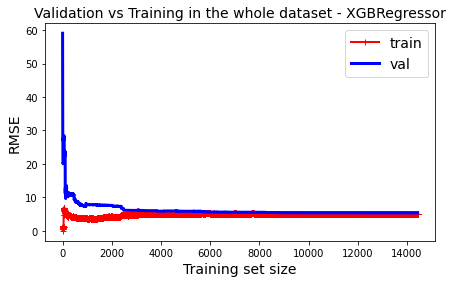

In [94]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(RandomFregressot_data_train, label_train.values.ravel())

xgb_best_estimator = rnd_search_xgb.best_estimator_

plot_learning_curves_and_evaluate(xgb_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

In [33]:
add_model_performance(regression_performance, 'XGB + RandomForest features', 5.37, 2.80)

Ridge Training Set RMSE: 6.59
Ridge Training Set MAE: 3.58
Ridge Validation Set RMSE: 6.83
Ridge Validation Set MAE: 3.66


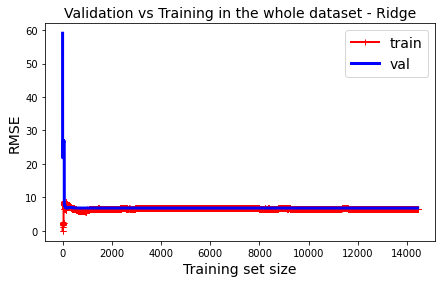

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#epsilon to avoid zero division error
epsilon = 1e-8  

param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2) + epsilon,
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']
}


ridge_reg = Ridge(random_state=42)

# Create the GridSearchCV
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_ridge.fit(RandomFregressot_data_train, label_train.values.ravel())

ridge_best_estimator = grid_search_ridge.best_estimator_

plot_learning_curves_and_evaluate(ridge_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

In [34]:
add_model_performance(regression_performance, 'Ridge + RandomForest features', 6.83, 3.66)

/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Training Set RMSE: 6.61
Lasso Training Set MAE: 3.67
Lasso Validation Set RMSE: 6.83
Lasso Validation Set MAE: 3.74


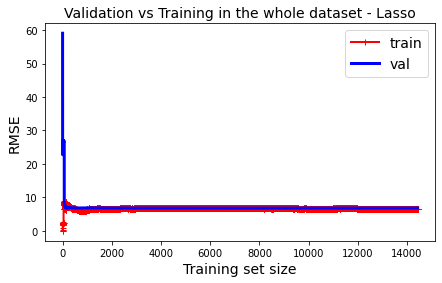

In [100]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

epsilon = 1e-8  

param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2) + epsilon,
}

lasso_regg = Lasso(max_iter=10000, random_state=42)

# Create the GridSearchCV
grid_search_lasso = GridSearchCV(lasso_regg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lasso.fit(RandomFregressot_data_train, label_train.values.ravel())

lasso_best_estimator = grid_search_lasso.best_estimator_

plot_learning_curves_and_evaluate(lasso_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

In [35]:
add_model_performance(regression_performance, 'Lasso + RandomForest features', 6.83, 3.74)

/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet Training Set RMSE: 6.61
ElasticNet Training Set MAE: 3.67
ElasticNet Validation Set RMSE: 6.83
ElasticNet Validation Set MAE: 3.74


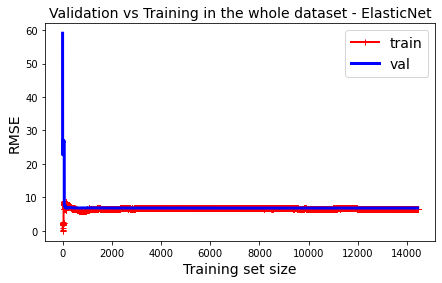

In [99]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid_elastic = {
    'alpha': np.arange(0.1, 5.1, 0.2),     # Range of alpha values
    'l1_ratio': np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
}

elastic_net = ElasticNet(random_state=42)


# Create the grid search
elastic_net_grid_search = GridSearchCV(elastic_net, param_grid_elastic, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

elastic_net_grid_search.fit(RandomFregressot_data_train, label_train.values.ravel())

elastic_net_best_estimator = elastic_net_grid_search.best_estimator_

plot_learning_curves_and_evaluate(elastic_net_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

In [36]:
add_model_performance(regression_performance, 'ElasticNet + RandomForest features', 6.83, 3.74)

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

#SGD (no penatly)
# hyperparameters to search
param_grid_SGD = {
    'eta0': np.arange(0.01, 1, 0.01),     # Range of eta0 values
}


SGD = SGDRegressor(random_state=42, max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty=None )

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD, param_grid_SGD, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(RandomFregressot_data_train, label_train.values.ravel())

SGD_best_estimator = SGD_grid_search.best_estimator_

evaluate_model_with_validation(SGD_best_estimator, RandomFregressot_data_train, label_train)
#plot_learning_curves_and_evaluate(SGD_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 6.75
SGDRegressor Training Set MAE: 3.47
SGDRegressor Validation Set RMSE: 7.00
SGDRegressor Validation Set MAE: 3.53


In [37]:
add_model_performance(regression_performance, 'SGD(No penalty) + RandomForest features', 7.00, 3.53)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1
# hyperparameters to search
param_grid_sgd_l1 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1 penalty
sgd_reg_l1 = SGDRegressor(penalty="l1", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search 
grid_search_sgd_l1 = GridSearchCV(sgd_reg_l1, param_grid_sgd_l1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1.fit(RandomFregressot_data_train, label_train.values.ravel())

SGD_l1_best_estimator = grid_search_sgd_l1.best_estimator_

evaluate_model_with_validation(SGD_l1_best_estimator, RandomFregressot_data_train, label_train)
#plot_learning_curves_and_evaluate(SGD_l1_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 27.42
SGDRegressor Training Set MAE: 15.94
SGDRegressor Validation Set RMSE: 27.29
SGDRegressor Validation Set MAE: 15.97


In [38]:
add_model_performance(regression_performance, 'SGD(+L1) + RandomForest features', 27.29, 15.97)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L2
# hyperparameters to search
param_grid_sgd_l2 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L2 penalty
sgd_reg_l2 = SGDRegressor(penalty="l2", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=10)

# Create the grid search
grid_search_sgd_l2 = GridSearchCV(sgd_reg_l2, param_grid_sgd_l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l2.fit(RandomFregressot_data_train, label_train.values.ravel())

SGD_l2_best_estimator = grid_search_sgd_l2.best_estimator_

evaluate_model_with_validation(SGD_l2_best_estimator, RandomFregressot_data_train, label_train)
#plot_learning_curves_and_evaluate(SGD_l2_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 676.30
SGDRegressor Training Set MAE: 580.74
SGDRegressor Validation Set RMSE: 680.36
SGDRegressor Validation Set MAE: 580.51


In [42]:
add_model_performance(regression_performance, 'SGD(+L2) + RandomForest features', 680.36, 580.51)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1L2
# hyperparameters to search
param_grid_sgd_l1l2 = {
    'alpha': np.arange(0.1, 1.1, 0.1),  # Range of alpha values
    'l1_ratio' :  np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1L2 penalty
sgd_reg_l1l2 = SGDRegressor(penalty="elasticnet", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search
grid_search_sgd_l1l2 = GridSearchCV(sgd_reg_l1l2, param_grid_sgd_l1l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1l2.fit(RandomFregressot_data_train, label_train.values.ravel())

SGD_L1l2_best_estimator = grid_search_sgd_l1l2.best_estimator_

evaluate_model_with_validation(SGD_L1l2_best_estimator, RandomFregressot_data_train, label_train)
#plot_learning_curves_and_evaluate(SGD_L1l2_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 27.42
SGDRegressor Training Set MAE: 15.94
SGDRegressor Validation Set RMSE: 27.29
SGDRegressor Validation Set MAE: 15.97


In [43]:
add_model_performance(regression_performance, 'SGD(+L1L2) + RandomForest features', 27.29, 15.97)

In [110]:
# NN libraries
import tensorflow as tf
from tensorflow import keras
import random
from tensorflow.keras import regularizers

In [111]:
x_train, x_val, y_train, y_val = train_test_split(
    RandomFregressot_data_train, label_train.values.ravel(), test_size=0.2, random_state=20
)

In [113]:
# Find the input layer size
RandomFregressot_data_train.shape

(18044, 3)

In [125]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea", seed=42)

random_search_tuner.search(x_train, y_train, epochs=100,
                           validation_data=(x_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=0)


Trial 5 Complete [00h 02m 21s]
val_mean_absolute_error: 94.31378173828125

Best val_mean_absolute_error So Far: 7.467399597167969
Total elapsed time: 00h 08m 13s


In [126]:
(random_search_tuner.oracle.get_best_trials(num_trials=1)[0]).summary()

Trial 3 summary
Hyperparameters:
n_hidden: 0
n_neurons: 150
learning_rate: 0.00028078309037793175
optimizer: Adam
activation: elu
Score: 7.467399597167969


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7751 - mean_absolute_error: 6.7751 - val_loss: 7.4503 - val_mean_absolute_error: 7.4503
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7580 - mean_absolute_error: 6.7580 - val_loss: 7.4321 - val_mean_absolute_error: 7.4321
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7422 - mean_absolute_error: 6.7422 - val_loss: 7.4110 - val_mean_absolute_error: 7.4110
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7256 - mean_absolute_error: 6.7256 - val_loss: 7.3934 - val_mean_absolute_error: 7.3934
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7090 - mean_absolute_error: 6.7090 - val_loss: 7.3727 - val_mean_absolute_error: 7.3727
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 6.6930 - mean_absolute_error: 6.6930 - val_loss: 7.3569 - val_mean_absolute_error: 7.3569
Epoch 7/10

452/452 [==============================] - 1s 2ms/step - loss: 5.1638 - mean_absolute_error: 5.1638 - val_loss: 5.6017 - val_mean_absolute_error: 5.6017
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 5.1472 - mean_absolute_error: 5.1472 - val_loss: 5.5869 - val_mean_absolute_error: 5.5869


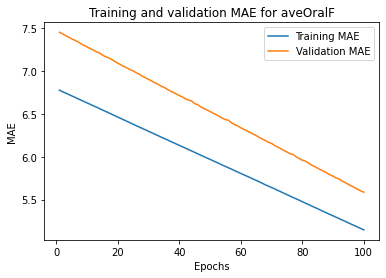

In [127]:
Forest_regg_data_random_search = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search.fit(x_train, y_train, epochs=100, 
                validation_data=(x_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [44]:
add_model_performance(regression_performance, 'NN + random_search (No regularizer) + RandomForest features', 'NA', 5.58)

In [143]:
#Save the model
Forest_regg_data_random_search.save("Forest_regg_data_random_search.h5")

In [129]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea_L1", seed=42)

random_search_tuner.search(x_train, y_train, epochs=100,
                           validation_data=(x_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=0)


Trial 5 Complete [00h 01m 23s]
val_mean_absolute_error: 12.106185913085938

Best val_mean_absolute_error So Far: 12.106185913085938
Total elapsed time: 00h 05m 01s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 11.1855 - mean_absolute_error: 11.1855 - val_loss: 11.6377 - val_mean_absolute_error: 11.6377
Epoch 2/100
452/452 [==============================] - 1s 1ms/step - loss: 10.6923 - mean_absolute_error: 10.6923 - val_loss: 11.1497 - val_mean_absolute_error: 11.1497
Epoch 3/100
452/452 [==============================] - 1s 1ms/step - loss: 10.2187 - mean_absolute_error: 10.2187 - val_loss: 10.6958 - val_mean_absolute_error: 10.6958
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 9.7533 - mean_absolute_error: 9.7533 - val_loss: 10.2621 - val_mean_absolute_error: 10.2621
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 9.3278 - mean_absolute_error: 9.3278 - val_loss: 9.8438 - val_mean_absolute_error: 9.8438
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 8.9235 - mean_absolute_error: 8.9235 - val_loss: 9.4685 - val_mean_absolute_error: 9.4

452/452 [==============================] - 1s 1ms/step - loss: 6.8266 - mean_absolute_error: 6.8266 - val_loss: 7.5236 - val_mean_absolute_error: 7.5236
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8215 - mean_absolute_error: 6.8215 - val_loss: 7.5173 - val_mean_absolute_error: 7.5173


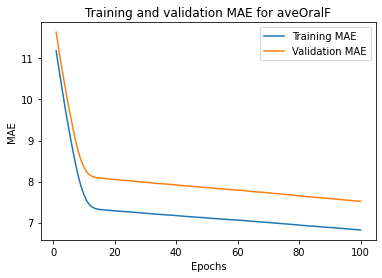

In [130]:
Forest_regg_data_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search_l1.fit(x_train, y_train, epochs=100, 
                validation_data=(x_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [45]:
add_model_performance(regression_performance, 'NN + random_search+L1 + RandomForest features', 'NA', 7.51)

In [142]:
#Save the model
Forest_regg_data_random_search_l1.save("Forest_regg_data_random_search_l1.h5")

In [132]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea_L2", seed=42)

random_search_tuner.search(x_train, y_train, epochs=100,
                           validation_data=(x_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=0)


Trial 5 Complete [00h 01m 28s]
val_mean_absolute_error: 12.106185913085938

Best val_mean_absolute_error So Far: 12.106185913085938
Total elapsed time: 00h 06m 23s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 11.1855 - mean_absolute_error: 11.1855 - val_loss: 11.6377 - val_mean_absolute_error: 11.6377
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 10.6923 - mean_absolute_error: 10.6923 - val_loss: 11.1497 - val_mean_absolute_error: 11.1497
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 10.2187 - mean_absolute_error: 10.2187 - val_loss: 10.6958 - val_mean_absolute_error: 10.6958
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 9.7533 - mean_absolute_error: 9.7533 - val_loss: 10.2621 - val_mean_absolute_error: 10.2621
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 9.3278 - mean_absolute_error: 9.3278 - val_loss: 9.8438 - val_mean_absolute_error: 9.8438
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 8.9235 - mean_absolute_error: 8.9235 - val_loss: 9.4685 - val_mean_absolute_error: 9.4

452/452 [==============================] - 1s 1ms/step - loss: 6.8266 - mean_absolute_error: 6.8266 - val_loss: 7.5236 - val_mean_absolute_error: 7.5236
Epoch 100/100
452/452 [==============================] - 1s 1ms/step - loss: 6.8215 - mean_absolute_error: 6.8215 - val_loss: 7.5173 - val_mean_absolute_error: 7.5173


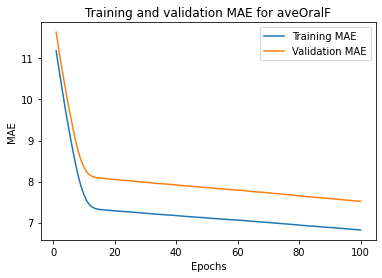

In [133]:
Forest_regg_data_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search_l2.fit(x_train, y_train, epochs=100, 
                validation_data=(x_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [46]:
add_model_performance(regression_performance, 'NN + random_search+L2 + RandomForest features', 'NA', 7.51)

In [141]:
#Save the model
Forest_regg_data_random_search_l2.save("Forest_regg_data_random_search_l2.h5")

In [135]:
import keras_tuner as kt
import tensorflow as tf
import random
from tensorflow.keras import regularizers

tf.keras.backend.clear_session()

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation="relu")(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout layer for regularization

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation="relu")(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea_Dtopout", seed=42)

random_search_tuner.search(x_train, y_train, epochs=100,
                           validation_data=(x_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=0)


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 40.5552 - mean_absolute_error: 40.5552 - val_loss: 14.8878 - val_mean_absolute_error: 14.8878
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 40.4073 - mean_absolute_error: 40.4073 - val_loss: 7.9858 - val_mean_absolute_error: 7.9858
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 39.9042 - mean_absolute_error: 39.9042 - val_loss: 20.3858 - val_mean_absolute_error: 20.3858
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 39.4531 - mean_absolute_error: 39.4531 - val_loss: 23.8975 - val_mean_absolute_error: 23.8975
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 39.1315 - mean_absolute_error: 39.1315 - val_loss: 10.1949 - val_mean_absolute_error: 10.1949
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 39.0696 - mean_absolute_error: 39.0696 - val_loss: 15.1786 - val_mean_absolute_err

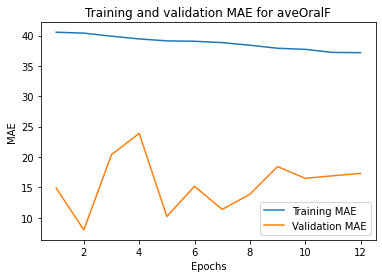

In [136]:
Forest_regg_data_random_search_DropOut = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search_DropOut.fit(x_train, y_train, epochs=100, 
                validation_data=(x_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [47]:
add_model_performance(regression_performance, 'NN + random_search+DropOut + RandomForest features', 'NA', 17.29)

In [140]:
#Save the model
Forest_regg_data_random_search_DropOut.save("Forest_regg_data_random_search_DropOut.h5")

In [137]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

hyperband_tuner = kt.Hyperband(
    build_model, objective="val_mean_absolute_error", max_epochs=100,
    factor=3, directory="regression_1", project_name="my_hyperband_Reg_ForestFea", seed=42)

hyperband_tuner.search(x_train, y_train, epochs=100,
                       validation_data=(x_val, y_val),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])


Trial 253 Complete [00h 01m 21s]
val_mean_absolute_error: 7.465919494628906

Best val_mean_absolute_error So Far: 2.203883171081543
Total elapsed time: 00h 43m 57s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3660 - mean_absolute_error: 2.3660 - val_loss: 2.2164 - val_mean_absolute_error: 2.2164
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3498 - mean_absolute_error: 2.3498 - val_loss: 2.3932 - val_mean_absolute_error: 2.3932
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3641 - mean_absolute_error: 2.3641 - val_loss: 2.2563 - val_mean_absolute_error: 2.2563
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3604 - mean_absolute_error: 2.3604 - val_loss: 2.2563 - val_mean_absolute_error: 2.2563
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3521 - mean_absolute_error: 2.3521 - val_loss: 2.2135 - val_mean_absolute_error: 2.2135
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3630 - mean_absolute_error: 2.3630 - val_loss: 2.3130 - val_mean_absolute_error: 2.3130
Epoch 7/10

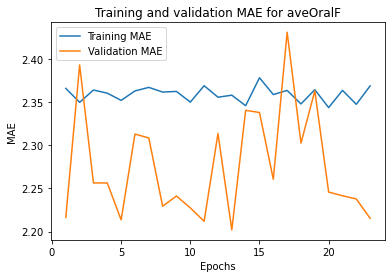

In [138]:
Forest_regg_data_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_hyper_search.fit(x_train, y_train, epochs=100, 
                validation_data=(x_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [48]:
add_model_performance(regression_performance, 'NN + hyperband_opt + RandomForest features', 'NA', 2.21)

In [139]:
#Save the model
Forest_regg_data_hyper_search.save("Forest_regg_data_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective="val_mean_absolute_error", max_trials=5,
    directory="regression_1", project_name="my_bayesian_opt_Reg_ForestFea", seed=42)


bayesian_opt_tuner.search(x_train, y_train, epochs=100,
                           validation_data=(x_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])



Trial 5 Complete [00h 02m 08s]
val_mean_absolute_error: 94.31378173828125

Best val_mean_absolute_error So Far: 7.467399597167969
Total elapsed time: 00h 08m 56s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7751 - mean_absolute_error: 6.7751 - val_loss: 7.4503 - val_mean_absolute_error: 7.4503
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7580 - mean_absolute_error: 6.7580 - val_loss: 7.4321 - val_mean_absolute_error: 7.4321
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7422 - mean_absolute_error: 6.7422 - val_loss: 7.4110 - val_mean_absolute_error: 7.4110
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 6.7256 - mean_absolute_error: 6.7256 - val_loss: 7.3934 - val_mean_absolute_error: 7.3934
Epoch 5/100
452/452 [==============================] - 1s 1ms/step - loss: 6.7090 - mean_absolute_error: 6.7090 - val_loss: 7.3727 - val_mean_absolute_error: 7.3727
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 6.6930 - mean_absolute_error: 6.6930 - val_loss: 7.3569 - val_mean_absolute_error: 7.3569
Epoch 7/10

452/452 [==============================] - 1s 2ms/step - loss: 5.1638 - mean_absolute_error: 5.1638 - val_loss: 5.6017 - val_mean_absolute_error: 5.6017
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 5.1472 - mean_absolute_error: 5.1472 - val_loss: 5.5869 - val_mean_absolute_error: 5.5869


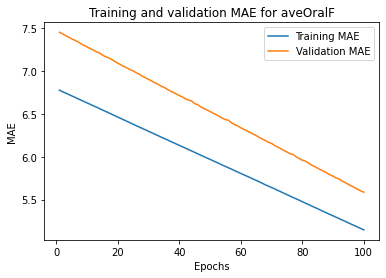

In [145]:
Forest_regg_data_bayesian_search = bayesian_opt_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_bayesian_search.fit(x_train, y_train, epochs=100, 
                validation_data=(x_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [49]:
add_model_performance(regression_performance, 'NN + bayesian_opt + RandomForest features', 'NA', 5.58)

In [146]:
#Save the model
Forest_regg_data_bayesian_search.save("Forest_regg_data_bayesian_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
# regression results dataframe checkpoint save
regression_performance.to_csv('regression_performance.csv', index=False)

In [52]:
regression_performance = pd.read_csv('regression_performance.csv')

In [53]:
sorted_df_regression = regression_performance.sort_values(by='MAE')
sorted_df_regression.head(6)

,Model,RMSE,MAE
17,NN + hyperband_opt + RandomForest features,NaN,2.21
5,XGB + RandomForest features,5.37,2.80
2,Random Forest,5.46,2.81
4,KNN + RandomForest features,5.76,2.86
3,Decision Tree + RandomForest features,5.61,2.91
9,SGD(No penalty) + RandomForest features,7.00,3.53


In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model("Forest_regg_data_hyper_search.h5")

x_test = RandomFregressot_data_test
y_test= label_test.values.ravel()


# Evaluate the model on the test set
test_mae = loaded_model.evaluate(x_test, y_test)

print("Test MAE:", test_mae)



141/141 [==============================] - 0s 1ms/step - loss: 2.3215 - mean_absolute_error: 2.3215
Test MAE: [2.321526288986206, 2.321526288986206]


In [147]:
# classification

In [4]:
numeric_data = Full_dataset3.select_dtypes(include=['number'])

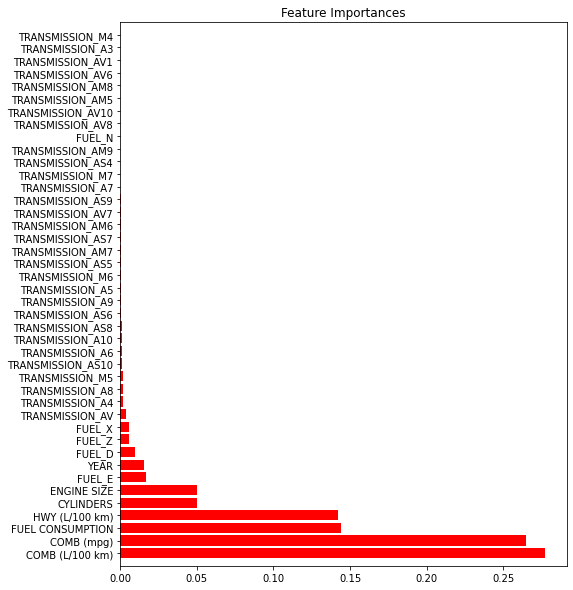

In [62]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Selecting only numeric columns from the dataset
numeric_data = Full_dataset3.select_dtypes(include=['number'])

X = numeric_data.drop(['EMISSIONS', 'CO2 Emission Class_high', 'CO2 Emission Class_low',
                       'CO2 Emission Class_medium', 'Unnamed: 0'], axis=1)
y = numeric_data[['CO2 Emission Class_high', 'CO2 Emission Class_low', 'CO2 Emission Class_medium']]


# Train a RandomForestClassifier model
rfC = RandomForestClassifier()
rfC.fit(X, y)

# Plot feature importances
importances = rfC.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")  # Swap x and y axis
plt.yticks(range(X.shape[1]), X.columns[indices])  # Set y-axis ticks as feature names
plt.ylim([-1, X.shape[1]])  # Set y-axis limit
plt.show()


In [7]:
Full_dataset3

,Unnamed: 0,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22552,22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22553,22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22554,22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

features_classifier = Full_dataset3.drop(["Unnamed: 0", "EMISSIONS"], axis=1)
target_classifier = Full_dataset3["CO2 Emission Class"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(features_classifier, target_classifier):
    stratified_train_classifier = features_classifier.loc[train_index]
    stratified_test_classifier = features_classifier.loc[test_index]

In [10]:
RandomFClassifier_data_train = stratified_train_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)", "CYLINDERS", "ENGINE SIZE", "YEAR",
                                                "FUEL_E"]]
RandomFClassifier_data_test = stratified_test_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)", "CYLINDERS", "ENGINE SIZE", "YEAR",
                                                "FUEL_E"]]

#label_train_Classifier = stratified_train_classifier[['CO2 Emission Class_high', 'CO2 Emission Class_low', 'CO2 Emission Class_medium']]
#label_test_Classifier = stratified_test_classifier[['CO2 Emission Class_high', 'CO2 Emission Class_low', 'CO2 Emission Class_medium']]

#Convet one-hot representation into an array
#label_train_Classifier_array = np.argmax(label_train_Classifier.values, axis=1)
#label_test_Classifier_array = np.argmax(label_test_Classifier.values, axis=1)


In [11]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
emission_cat_train = stratified_train_classifier[["CO2 Emission Class"]]
emission_cat_test = stratified_test_classifier[["CO2 Emission Class"]]

train_label_1hot = cat_encoder.fit_transform(emission_cat_train).toarray()
test_label_1hot = cat_encoder.fit_transform(emission_cat_test).toarray()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_RandomFClass_train = scaler.fit_transform(RandomFClassifier_data_train)
scaled_RandomFClass_test = scaler.fit_transform(RandomFClassifier_data_test)

In [66]:
classification_performance_df = pd.DataFrame(columns=['Model', 'F1'])

In [67]:
# Define a function to manually add model performance
def add_model_performance_classification(df, model_name, f1):
    df_length = len(df)
    df.loc[df_length] = [model_name, f1]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

def evaluate_model_with_validation_classifier(model, X_train, X_val, y_train, y_val):
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Train set
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_predict, average='weighted')
    print(f'{model_name} Training Set F1 Score: {train_f1:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_f1 = f1_score(y_val, y_val_predict, average='weighted')
    print(f'{model_name} Validation Set F1 Score: {val_f1:.2f}')

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
   
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(scaled_RandomFClass_train, train_label_1hot, test_size=0.2, random_state=10)

RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 0.99


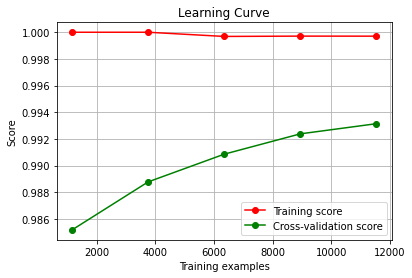

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]}
  ]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(X_train, y_train)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator, "Learning Curve",
                    X_train, y_train)

In [31]:
# also check on the test set as the training and validation score was to high
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9942399507427151


In [38]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels back to original format
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
print("RandomForest Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


RandomForest Confusion Matrix:
[[1847    0   11]
 [   0  184    2]
 [   9    4 2455]]


In [73]:
add_model_performance_classification(classification_performance_df, "Random Forest", 0.99)

DecisionTreeClassifier Training Set F1 Score: 0.99
DecisionTreeClassifier Validation Set F1 Score: 0.99


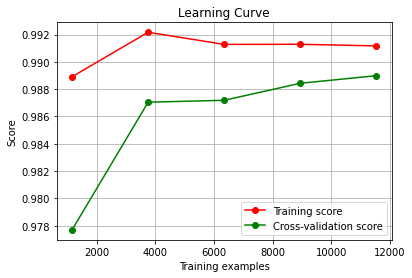

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_Classifier = DecisionTreeClassifier()

# Perform grid search
grid_search_tree = GridSearchCV(tree_Classifier, param_grid_tree, cv=10, n_jobs=-1, scoring='f1_weighted',
                           return_train_score=True)
grid_search_tree.fit(X_train, y_train)

DescionTClassifier_best_estimator = grid_search_tree.best_estimator_

evaluate_model_with_validation_classifier(DescionTClassifier_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(DescionTClassifier_best_estimator, "Learning Curve",
                    X_train, y_train)


In [75]:
add_model_performance_classification(classification_performance_df, "Descion Tree", 0.99)

KNeighborsClassifier Training Set F1 Score: 1.00
KNeighborsClassifier Validation Set F1 Score: 0.98


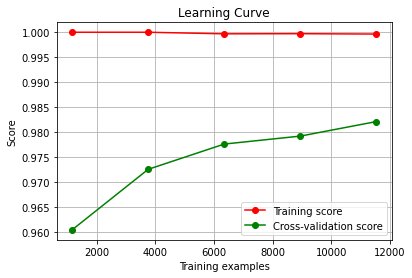

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_classifier = KNeighborsClassifier()

# Grid search
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'f1_weighted',
                           return_train_score=True)

grid_search_knn.fit(X_train, y_train)

knn_best_estimator = grid_search_knn.best_estimator_

evaluate_model_with_validation_classifier(knn_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(knn_best_estimator, "Learning Curve",
                    X_train, y_train)

In [77]:
add_model_performance_classification(classification_performance_df, "KNN", 0.98)

In [78]:
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = knn_best_estimator.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9869169624515871


In [39]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels back to original format
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

#  confusion matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


KNN Confusion Matrix:
[[1847    0   11]
 [   0  184    2]
 [   9    4 2455]]


XGBClassifier Training Set F1 Score: 1.00
XGBClassifier Validation Set F1 Score: 0.99


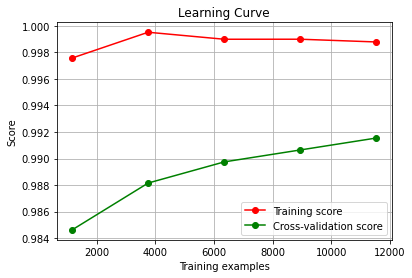

In [40]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBClassifier(random_state=10)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
rnd_search_xgb.fit(X_train, y_train)

xgb_best_estimator = rnd_search_xgb.best_estimator_

evaluate_model_with_validation_classifier(xgb_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(xgb_best_estimator, "Learning Curve",
                    X_train, y_train)

In [80]:
add_model_performance_classification(classification_performance_df, "XGB", 0.99)

In [ ]:
# Ridge classifier do not support multiclass classification
#maybe avoid gradient descent

MultiOutputClassifier Training Set F1 Score: 0.97
MultiOutputClassifier Validation Set F1 Score: 0.97


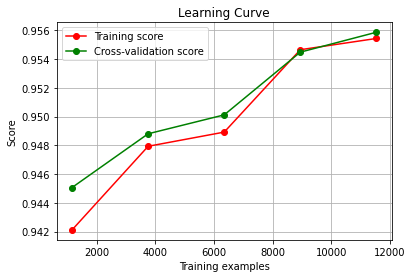

In [41]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Adjust the range of eta0 values to ensure they are all greater than 0
param_grid_SGD = {
    'estimator__alpha': np.arange(0.01, 1, 0.01),  # Range of alpha values for SGDClassifier
    'estimator__eta0': np.arange(0.01, 1, 0.01)  # Adjusted range for eta0
}

SGD_classifier = SGDClassifier(random_state=10, max_iter=10000, tol=1e-3, learning_rate='invscaling', penalty=None)

# Create the MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(SGD_classifier)

# Create the grid search
SGD_grid_search = GridSearchCV(multi_output_classifier, param_grid_SGD, cv=10, scoring='f1_weighted', n_jobs=-1, return_train_score=True)

# Fit the grid search
SGD_grid_search.fit(X_train, y_train)

# Get the best estimator
SGD_classifier_best_estimator = SGD_grid_search.best_estimator_

# Evaluate the best estimator
evaluate_model_with_validation_classifier(SGD_classifier_best_estimator, X_train, X_val, y_train, y_val)

# Plot learning curve
plot_learning_curve(SGD_classifier_best_estimator, "Learning Curve",
                    X_train, y_train)

In [95]:
add_model_performance_classification(classification_performance_df, "MultiOutputClassifier ", 0.97)

In [91]:
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = SGD_classifier_best_estimator.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9670659217773858


In [94]:
# next cell take a long timme...

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Adjust the range of eta0 values to ensure they are all greater than 0
param_grid_SGD = {
    'estimator__alpha': np.arange(0.01, 1, 0.01),  # Range of alpha values for SGDClassifier
    'estimator__eta0': np.arange(0.01, 1, 0.01),    # Adjusted range for eta0
    'estimator__penalty': ['l1', 'l2', 'l1l2']              # Penalties to search
}

SGD_classifier = SGDClassifier(random_state=10, max_iter=10000, tol=1e-3, learning_rate='invscaling')

# Create the MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(SGD_classifier)

# Create the grid search
SGD_grid_search = GridSearchCV(multi_output_classifier, param_grid_SGD, cv=10, scoring='f1_weighted', n_jobs=-1, return_train_score=True)

# Fit the grid search
SGD_grid_search.fit(X_train, y_train)

# Get the best estimator
SGD_classifier_best_estimator = SGD_grid_search.best_estimator_

# Evaluate the best estimator
evaluate_model_with_validation_classifier(SGD_classifier_best_estimator, X_train, X_val, y_train, y_val)


LogisticRegression Training Set F1 Score: 0.98
LogisticRegression Validation Set F1 Score: 0.98


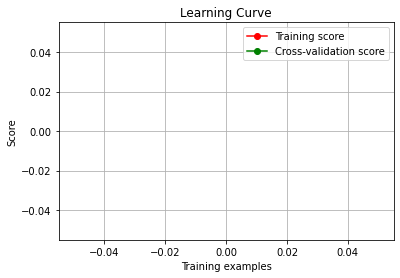

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import numpy as np

# Assuming y_train is your one-hot encoded labels
y_train_class_labels = np.argmax(y_train, axis=1)
y_val_class_labels = np.argmax(y_val, axis=1)


# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['saga'],  # Use only 'saga' solver
    'multi_class': ['ovr', 'multinomial']  # Strategy for multiclass classification
}

# Instantiate logistic regression classifier
logistic_regression = LogisticRegression(max_iter=10000)

# Grid search with cross-validation
Logistic_grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='f1_weighted')

# Fit grid search to data
Logistic_grid_search.fit(X_train, y_train_class_labels)

# Access the best estimator
best_logistic_regression = Logistic_grid_search.best_estimator_

evaluate_model_with_validation_classifier(best_logistic_regression, X_train, X_val, y_train_class_labels, y_val_class_labels)

# Plot learning curve
plot_learning_curve(best_logistic_regression, "Learning Curve",
                    X_train, y_train)

In [96]:
# NN libraries
import tensorflow as tf
from tensorflow import keras
import random
from tensorflow.keras import regularizers

In [99]:
X_train.shape

(14435, 8)

In [100]:
y_train.shape

(14435, 3)

In [105]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 22s]
val_f1_m: 0.0

Best val_f1_m So Far: 0.6409881711006165
Total elapsed time: 00h 02m 48s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 0.8315 - accuracy: 0.5458 - f1_m: 0.6387 - val_loss: 0.8220 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8315 - accuracy: 0.5464 - f1_m: 0.6387 - val_loss: 0.8290 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8310 - accuracy: 0.5460 - f1_m: 0.6387 - val_loss: 0.8271 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.5450 - f1_m: 0.6387 - val_loss: 0.8239 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8311 - accuracy: 0.5465 - f1_m: 0.6387 - val_loss: 0.8250 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8305 - accuracy: 0.5451 - f1_m: 0.6387

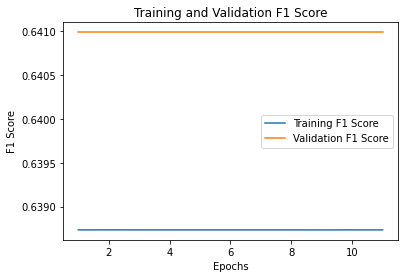

In [106]:
Classification_random_search = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [107]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch (overfitting) ", 0.64)

In [108]:
#Save the model
Classification_random_search.save("Classification_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L1 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation,
                                 kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification_l1"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 14s]
val_f1_m: 0.9569800496101379

Best val_f1_m So Far: 0.9800110459327698
Total elapsed time: 00h 01m 27s


Epoch 1/100
452/452 [==============================] - 4s 3ms/step - loss: 0.1621 - accuracy: 0.9777 - f1_m: 0.9777 - val_loss: 0.1589 - val_accuracy: 0.9806 - val_f1_m: 0.9804
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9798 - f1_m: 0.9791 - val_loss: 0.1768 - val_accuracy: 0.9734 - val_f1_m: 0.9734
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1535 - accuracy: 0.9793 - f1_m: 0.9794 - val_loss: 0.1515 - val_accuracy: 0.9762 - val_f1_m: 0.9761
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1502 - accuracy: 0.9794 - f1_m: 0.9794 - val_loss: 0.1498 - val_accuracy: 0.9787 - val_f1_m: 0.9786
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9796 - f1_m: 0.9796 - val_loss: 0.1423 - val_accuracy: 0.9798 - val_f1_m: 0.9797
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1441 - accuracy: 0.9794 - f1_m: 0.9794

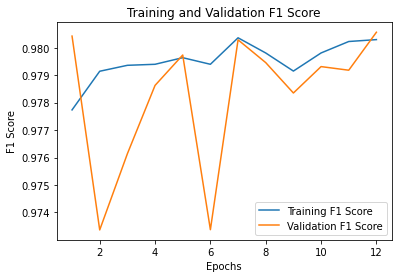

In [111]:
Classification_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search_l1.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [112]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +L1 ", 0.98)

In [113]:
Classification_random_search_l1.save("Classification_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [114]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L1 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation,
                                 kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification_l2"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 14s]
val_f1_m: 0.9608517289161682

Best val_f1_m So Far: 0.9819468855857849
Total elapsed time: 00h 01m 53s


Epoch 1/100
452/452 [==============================] - 4s 3ms/step - loss: 0.1096 - accuracy: 0.9770 - f1_m: 0.9770 - val_loss: 0.1052 - val_accuracy: 0.9795 - val_f1_m: 0.9795
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9776 - f1_m: 0.9769 - val_loss: 0.1117 - val_accuracy: 0.9756 - val_f1_m: 0.9756
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1130 - accuracy: 0.9764 - f1_m: 0.9765 - val_loss: 0.1100 - val_accuracy: 0.9709 - val_f1_m: 0.9707
Epoch 4/100
452/452 [==============================] - 2s 3ms/step - loss: 0.1037 - accuracy: 0.9782 - f1_m: 0.9783 - val_loss: 0.1248 - val_accuracy: 0.9701 - val_f1_m: 0.9701
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9792 - f1_m: 0.9792 - val_loss: 0.0973 - val_accuracy: 0.9792 - val_f1_m: 0.9792
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9794 - f1_m: 0.9794

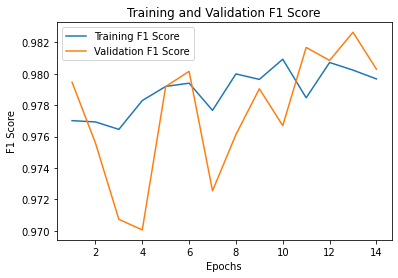

In [115]:
Classification_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search_l2.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [116]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +L2 ", 0.98)

In [117]:
Classification_random_search_l2.save("Classification_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [119]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        
    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification_dropout"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 13s]
val_f1_m: 0.9742035269737244

Best val_f1_m So Far: 0.9829126596450806
Total elapsed time: 00h 01m 36s


Epoch 1/100
452/452 [==============================] - 3s 3ms/step - loss: 0.0682 - accuracy: 0.9775 - f1_m: 0.9776 - val_loss: 0.0622 - val_accuracy: 0.9823 - val_f1_m: 0.9822
Epoch 2/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0635 - accuracy: 0.9794 - f1_m: 0.9787 - val_loss: 0.0678 - val_accuracy: 0.9795 - val_f1_m: 0.9795
Epoch 3/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0631 - accuracy: 0.9793 - f1_m: 0.9792 - val_loss: 0.0740 - val_accuracy: 0.9817 - val_f1_m: 0.9817
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9773 - f1_m: 0.9774 - val_loss: 0.0683 - val_accuracy: 0.9789 - val_f1_m: 0.9789
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9792 - f1_m: 0.9792 - val_loss: 0.0700 - val_accuracy: 0.9814 - val_f1_m: 0.9814
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9785 - f1_m: 0.9784

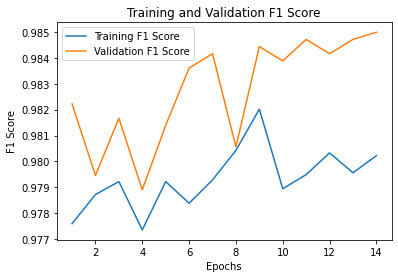

In [120]:
Classification_random_search_Dropout = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search_Dropout.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [121]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +Dropout (overfitts) ", 0.98)

In [122]:
Classification_random_search_Dropout.save("Classification_random_search_Dropout.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")


hyperband_tuner = kt.Hyperband(
    build_model, objective=objective, max_epochs=100,
    factor=3, directory="classification_1", project_name="my_hyperband_classification", seed=42)

hyperband_tuner.search(X_train, y_train, epochs=100,
                       validation_data=(X_val, y_val),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 254 Complete [00h 00m 11s]
val_f1_m: 0.9525333046913147

Best val_f1_m So Far: 0.9908738732337952
Total elapsed time: 00h 36m 41s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0244 - accuracy: 0.9905 - f1_m: 0.9905 - val_loss: 0.0283 - val_accuracy: 0.9911 - val_f1_m: 0.9912
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 0.9920 - f1_m: 0.9913 - val_loss: 0.0267 - val_accuracy: 0.9911 - val_f1_m: 0.9910
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9915 - f1_m: 0.9915 - val_loss: 0.0280 - val_accuracy: 0.9917 - val_f1_m: 0.9917
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9920 - f1_m: 0.9920 - val_loss: 0.0298 - val_accuracy: 0.9886 - val_f1_m: 0.9886
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.9921 - f1_m: 0.9921 - val_loss: 0.0309 - val_accuracy: 0.9895 - val_f1_m: 0.9895
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9920 - f1_m: 0.9920

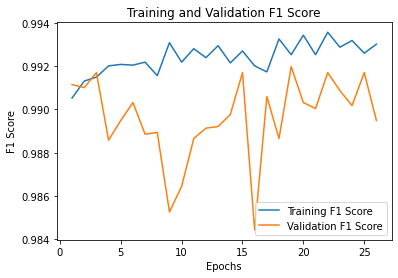

In [124]:
Classification_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

history = Classification_hyper_search.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [125]:
add_model_performance_classification(classification_performance_df, "NN+Hyperband ", 0.98)

In [126]:
Classification_hyper_search.save("Classification_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [127]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")


bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective=objective, max_trials=5,
    directory="classification_1", project_name="my_bayesian_classification", seed=42)

bayesian_opt_tuner.search(X_train, y_train, epochs=100,
                       validation_data=(X_val, y_val),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 15s]
val_f1_m: 0.9737820625305176

Best val_f1_m So Far: 0.9737820625305176
Total elapsed time: 00h 01m 12s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0833 - accuracy: 0.9749 - f1_m: 0.9749 - val_loss: 0.0840 - val_accuracy: 0.9731 - val_f1_m: 0.9731
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9750 - f1_m: 0.9744 - val_loss: 0.0859 - val_accuracy: 0.9698 - val_f1_m: 0.9698
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9763 - f1_m: 0.9764 - val_loss: 0.0806 - val_accuracy: 0.9731 - val_f1_m: 0.9730
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9764 - f1_m: 0.9764 - val_loss: 0.0805 - val_accuracy: 0.9753 - val_f1_m: 0.9754
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9775 - f1_m: 0.9775 - val_loss: 0.0772 - val_accuracy: 0.9753 - val_f1_m: 0.9753
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9772 - f1_m: 0.9772

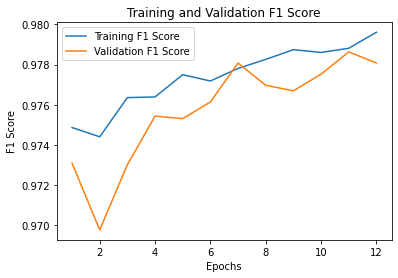

In [128]:
Classification_bayesian_opt = bayesian_opt_tuner.get_best_models(num_models=1)[0]

history = Classification_bayesian_opt.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [129]:
add_model_performance_classification(classification_performance_df, "NN+Bayesian ", 0.97)

In [130]:
Classification_bayesian_opt.save("Classification_bayesian_opt.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [131]:
classification_performance_df.to_csv('classification_performance_df.csv', index=False)

In [132]:
classification_performance_df = pd.read_csv('classification_performance_df.csv')

In [133]:
classification_performance_df

,Model,F1
0,Random Forest,0.99
1,Descion Tree,0.99
2,KNN,0.98
3,XGB,0.99
4,MultiOutputClassifier,0.97
5,NN+RandomSearch (overfitting),0.64
6,NN+RandomSearch +L1,0.98
7,NN+RandomSearch +L2,0.98
8,NN+RandomSearch +Dropout (overfitts),0.98
9,NN+Hyperband,0.98
